## Assignment 1

**Submission deadlines:** 
- get at least **2** points by Tuesday, 9.03.2021
- remaining points: last lab session before or on Tuesday, 16.03.2021

**Points:** Aim to get 8 out of 12 possible points

## Submission instructions
The class is held remotely. To sumbmit your solutions please show the notebook over the video call. Make sure you know all the questions and asnwers, and that the notebook contains results (before presentation do `Runtime -> Restar and run all`)

We provide starter code, however you are not required to use it as long as you properly solve the tasks.

As always, please submit corrections using GitHub's Pull Requests to https://github.com/janchorowski/dl_uwr.

# Task description

## TLDR
Implement and train a neural network using pure numpy.


## Problem 1 [2p]
Implement a two-layer network, manually set weights and biases to solve the XOR task.

A two-layer neural network implementes a function $f: \mathbb{R}^D \rightarrow \mathbb{R}^O$ where $D$ is the input dimensionality and $O$ is the output dinemsionality. The output goes through an intermediate representation (the hidden layer) with dimensionality $H$. 

The computations are as follows:
\begin{equation}
\begin{split}
A_1 &= x W_1^T + b_1  & \qquad\text{Total input to neurons in the hidden layer (network's first layer)} \\
O_1 &= \sigma_1(A_1)  & \qquad\text{Output of the hidden layer} \\
A_2 &= O_1 W_2^T + b_2 & \qquad\text{Total input to neurons in the output layer (network's second layer)}\\
O_2 &= \sigma_2(A_2) & \qquad\text{Output of the network}
\end{split}
\end{equation}

Where $W$ are weight matrices, $b$ are bias vectors, $\sigma$ are non-linear activation functions (e.g. the logistic sigmoid applied element-wise, or softmax).

For the 2D xor problem the network will:
- have 2 inputs, 2 hidden neurons, one output
- use the logistic sigmoid everywhere (that way we, when hand-designig the weights, we can assume that neurons' outputs are binary).

Therrefore the shapes of the data floing through the network will be:
- input: $x\in\mathbb{}R^{2}$
- hidden layer parameters: $W_1\in\mathbb{}R^{2\times 2}$ and $b_1\in\mathbb{}R^{2}$
- representations in the hidden layer: $A_1\in\mathbb{}R^{2}$ and $O_1\in\mathbb{}R^{2}$
- output layer parameters: $W_2\in\mathbb{}R^{1\times 2}$ and $b_1\in\mathbb{}R^{1}$
- representations in the output layer: $A_2\in\mathbb{}R^{1}$ and $O_2\in\mathbb{}R^{1}$

The network can be seen as a logistic regression model, prefixed by a nonlinear transformation of the data.

The first tasks consists of:
- implementing the network
- selecting parametwrs ($W_1, b_1, W_2, b_2$) such that $f(x)\approx XOR(x_1, x_2)$ where the approximation is die to the sigmoids - the output may be close to 0 or 1, but doesn't need to saturate at 0 or 1.

NB: the convention on weight matrix shapes follows linear [layers in PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html).


## Problem 2 [2p]
1. Add a backward pass.
2. Use a sensible random initialization for weights and biases.
3. Numerically check the correctness of your gradient computation.

There is nice article about taking derivative over vectors and vector chain rule: https://explained.ai/matrix-calculus/ if someone don't have experience with suchr calculus.


## Problem 3 [2p]
1. Implement gradient descent
2. Train your network to solve 3D XOR
3. Try several hidden layer sizes, for each size record the fracton of successful trainings. Then answer:
    - What is the minimal hidden size required to solve 3D XOR (even with low reliability, when the training has to be repeated multiple times)
    - What is the minimal hidden size required to reliably solve 3D XOR
    - Which networks are easier to train - small or large ones? Why?


## Problem 4 [1p]
Replace the first nonlinearity with the [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) activation function. Find a network architecture which reliably learns the 3D XOR problem.


## Problem 5 [1p]
Add a second hidden layer to your network, implement the forward and backward pass, then demonstrate training.


## Problem 6 [2p]
Implement a way to have a _variable number_ of hidden layers. Check how deep sigmoid or ReLU networks you  can train. For simplicity you can assume that all hidden layers have the same number of neurons, and use the same activation function.


## Problem 7 [2p]
For each weight matrix $w\in\mathbb{R}^{n\times m}$, add a randomly initialized `backward weight` $w_b\in\mathbb{R}^{m\times n}$, which will not change during training. Change the backward pass to use $w_b$ instead of $w^T$, getting an approxmatoin of the true gradient. Can you get your network to train?

NB: this approach, dubbed [feedback alignment](https://www.nature.com/articles/ncomms13276), was proposed to make error backpropagation more biologically plausible, by providing a solution to the "weight transport problem". Regular backpropagation requires that neurons not only know their incoming weights (thet they control), but also their outgoing weights (that are controlled by neurons in the upper layers). This is nearly impossible in a real brain.

# Solutions and starter code

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

XOR dataset creation

(-0.05, 1.05, -0.05, 1.05)

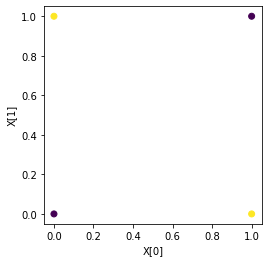

In [ ]:
# Let's define a XOR dataset

# X will be matrix of N 2-dimensional inputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1],], dtype=np.float32)
# Y is a matrix of N numners - answers
Y = np.array([[0], [1], [1], [0],], dtype=np.float32)

plt.scatter(
    X[:, 0], X[:, 1], c=Y[:, 0],
)
plt.xlabel("X[0]")
plt.ylabel("X[1]")
plt.axis("square")

## Problem 1

The code below contains a mock-up of a two-layer neural network. Fill in the code and manually set weights to solve the XOR problem.

Please note: the shapes are set to be compatible with PyTorch's conventions:
* a batch containing $N$ $D$-dimensional examples has shape $N\times D$ (each example is a row!)
* a weight matrix in a linear layer with $I$ inputs and $O$ outputs has shape $O \times I$
* a bias vector is a 1D vector. Please note that [broadcasting rules](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) allow us to think about it as a $1 \times D$ matrix.

In [ ]:
def sigmoid(x):
    # TODO
    return 1/(1+np.exp(-x))


class SmallNet:
    def __init__(self, in_features, num_hidden, dtype=np.float32):
        self.W1 = np.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = np.zeros((num_hidden,), dtype=dtype)
        self.W2 = np.zeros((1, num_hidden), dtype=dtype)
        self.b2 = np.zeros((1,), dtype=dtype)
        self.init_params()

    def init_params(self):
        # TODO for Problem 2:
        # set all parameters to small random values, e.g. from N(0, 0.5)
        self.W1 = np.random.normal(0, 0.5, size=(self.W1.shape))
        self.W2 = np.random.normal(0, 0.5, size=(self.W2.shape))
        self.b1 = np.random.normal(0, 0.5, size=(self.b1.shape))
        self.b2 = np.random.normal(0, 0.5, size=(self.b2.shape))

    def forward(self, X, Y=None, do_backward=False):
        # TODO Problem 1: Fill in details of forward propagation

        # Input to neurons in 1st layer
        A1 = X @ self.W1.T + self.b1
        # Outputs after the sigmoid non-linearity
        O1 = sigmoid(A1)
        # Inputs to neuron in the second layer
        A2 = O1 @ self.W2.T + self.b2
        # Outputs after the sigmoid non-linearity
        O2 = sigmoid(A2)

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            loss = -Y * np.log(O2) - (1 - Y) * np.log(
                1.0 - O2)
            # loss = TODO cross-entropy loss
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        # if verbose and loss != np.nan:
        #     print(loss)

        if do_backward:
            # TODO in Problem 2:
            # fill in the gradient computation
            # Please note, that there is a correspondance between
            # the forward and backward pass: with backward computations happening
            # in reverse order.
            # We save the gradients with respect to the parameters as fields of self.
            # It is not very elegant, but simplifies training code later on.

            # A2_grad is the gradient of loss with respect to A2
            # Hint: there is a concise formula for the gradient
            # of logistic sigmoid and cross-entropy loss


            # n x 1
            A2_grad = (O2 - Y) / X.shape[0]

            # 1
            self.b2_grad = A2_grad.sum(0)

            # 1 x n @ n x hidden = 1 x hidden
            self.W2_grad = A2_grad.T @ O1

            # n x 1 @ 1 x h = n x h
            O1_grad = A2_grad @ self.W2

            # n x h
            A1_grad = O1_grad * sigmoid(A1) * (1 - sigmoid(A1))

            # 1 x h
            self.b1_grad = A1_grad.sum(0)

            # h x n @ n x d = h x d
            self.W1_grad = A1_grad.T @ X

        return O2, loss

In [ ]:
# TODO Problem 1:
# Set by hand the weight values to solve the XOR problem

net = SmallNet(2, 2, dtype=np.float64)
net.W1 = np.array([[10, 10], [10, 10]])
net.b1 = np.array([-5, -15])
net.W2 = np.array([10, -10])
net.b2 = np.array([-5])

# Hint: since we use the logistic sigmoid activation, the weights may need to
# be fairly large


predictions, loss = net.forward(X, Y, do_backward=False)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p}")

XORnet([0. 0.]) = 0.0071527881888964915
XORnet([0. 1.]) = 0.9923558641717396
XORnet([1. 0.]) = 0.9923558641717396
XORnet([1. 1.]) = 0.0071527881888964785


## Problem 2

In [ ]:
def check_grad(net, param_name, X, Y, eps=1e-5):
    """A gradient checking routine"""

    param = getattr(net, param_name)
    param_flat_accessor = param.reshape(-1)

    grad = np.empty_like(param)
    grad_flat_accessor = grad.reshape(-1)

    net.forward(X, Y, do_backward=True)
    orig_grad = getattr(net, param_name + "_grad")
    assert param.shape == orig_grad.shape

    for i in range(param_flat_accessor.shape[0]):
        orig_val = param_flat_accessor[i]
        param_flat_accessor[i] = orig_val + eps
        _, loss_positive = net.forward(X, Y)
        param_flat_accessor[i] = orig_val - eps
        _, loss_negative = net.forward(X, Y)
        param_flat_accessor[i] = orig_val
        grad_flat_accessor[i] = (loss_positive - loss_negative) / (2 * eps)
    assert np.allclose(grad, orig_grad)
    return grad, orig_grad

In [ ]:
# Hint: use float64 for checking the correctness of the gradient
net = SmallNet(2, 2, dtype=np.float64)

for param_name in ["W1", "b1", "W2", "b2"]:
    check_grad(net, param_name, X, Y)

## Problem 3

In [ ]:
net = SmallNet(2, 10, dtype=np.float64)

alpha = 0.1  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X, Y, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2"]:
        param = getattr(net, param_name)
        # Hint: use the construct `param[:]` to change the contents of the array!
        # Doing instead `param = new_val` simply changes to what the variable
        # param points to, without affecting the network!
        # alternatively, you could do setattr(net, param_name, new_value)
        param[:] = param - alpha * getattr(
            net, param_name + "_grad")
        # param[:] = TODO

after 0 steps 	loss=0.8581838092904905
after 5000 steps 	loss=0.1031148605008132
after 10000 steps 	loss=0.014179698233037528
after 15000 steps 	loss=0.006862621353130674
after 20000 steps 	loss=0.004401701910358321
after 25000 steps 	loss=0.0031928656382196616
after 30000 steps 	loss=0.002481898758841022
after 35000 steps 	loss=0.0020169339591321533
after 40000 steps 	loss=0.001690741105537925
after 45000 steps 	loss=0.0014501794947695944
after 50000 steps 	loss=0.0012660038543927253
after 55000 steps 	loss=0.0011208317900075252
after 60000 steps 	loss=0.0010037035646713465
after 65000 steps 	loss=0.0009073781582132461
after 70000 steps 	loss=0.0008268862429463682
after 75000 steps 	loss=0.0007587083986959311
after 80000 steps 	loss=0.0007002850371535016
after 85000 steps 	loss=0.000649711931836331
after 90000 steps 	loss=0.0006055443601478981
after 95000 steps 	loss=0.000566667280031232


In [ ]:
predictions, loss = net.forward(X, Y, do_backward=True)
for x, p in zip(X, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet([0. 0.]) = 0.0004097106052673963
XORnet([0. 1.]) = 0.9995843165323832
XORnet([1. 0.]) = 0.9993142291310733
XORnet([1. 1.]) = 0.0006170669840561832


In [ ]:
import time

X3 = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=np.float32)
Y3 = np.array([[0], [1], [1], [0], [1], [0], [0], [1]], dtype=np.float32)

alpha = 0.1
num_of_trainings = 10
iters = 100000
fractions = []
mean_loss = []
fractions_close_to_Y = []
tolerance = 0.05
average_training_time = []
for hidden_dim in [2, 3, 5, 10, 20]:
    # TODO: run a few trainings and record the fraction of successful ones
    count_success = 0
    count_close = 0
    sum_loss = 0
    sum_time = 0
    for i in range(num_of_trainings):
        start = time.time()
        net = SmallNet(3, hidden_dim, dtype=np.float64)
        for i in range(iters):
            _, loss = net.forward(X3, Y3, do_backward=True)
            for param_name in ["W1", "b1", "W2", "b2"]:
                param = getattr(net, param_name)
                param[:] = param - alpha * getattr(
                    net, param_name + "_grad")
        end = time.time()
        predictions, loss = net.forward(X3, Y3, do_backward=True)
        if all(np.abs(Y3 - predictions) < 0.5):
            count_success += 1
        if all(np.abs(Y3 - predictions) < tolerance):
            count_close += 1
        sum_loss += loss
        sum_time += end-start
    average_training_time.append(sum_time / num_of_trainings)
    mean_loss.append(sum_loss / num_of_trainings)
    fractions_close_to_Y.append(count_close / num_of_trainings)
    fractions.append(count_success / num_of_trainings)

In [ ]:
print(f"Mean loss: {mean_loss}\nFraction of close to Y: {fractions_close_to_Y}\nFraction of correct choice: {fractions}\nAverage training time: {average_training_time}")

Mean loss: [0.1368434730193854, 0.0017474543973225731, 0.0008072502553501889, 0.0005802519277813425, 0.0005641859104214355]
Fraction of close to Y: [0.6, 1.0, 1.0, 1.0, 1.0]
Fraction of correct choice: [0.6, 1.0, 1.0, 1.0, 1.0]
Average training time: [11.720435547828675, 11.798751997947694, 12.125194668769836, 12.003323125839234, 12.799034905433654]


From the below plot we see that 2 neurons in hidden layer can solve 3d xor. Also from two below plots we see that 3 neurons are enough to reliably solve 3d xor.

<BarContainer object of 5 artists>

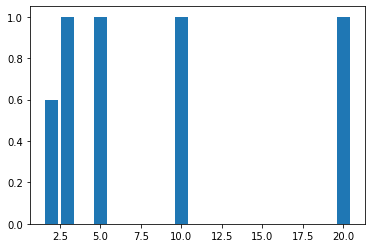

In [ ]:
plt.bar([2, 3, 5, 10, 20], fractions)

<BarContainer object of 5 artists>

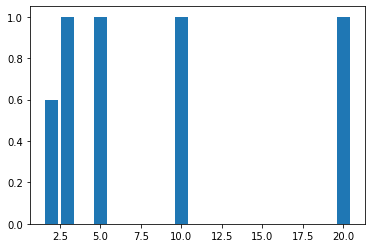

In [ ]:
plt.bar([2, 3, 5, 10, 20], fractions_close_to_Y)

From below plot we see that loss for 2 neurons is quite big, for 3 neurons much smaller, for 5, 10 and 20 quite similar and relatively small.

<BarContainer object of 5 artists>

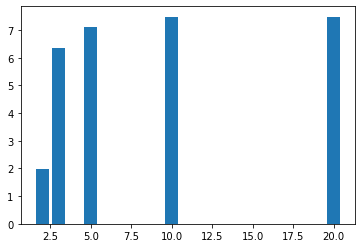

In [ ]:
plt.bar([2, 3, 5, 10, 20], -np.log(mean_loss))

Computation times are very similar, but a bit longer for bigger number of neurons.

<BarContainer object of 5 artists>

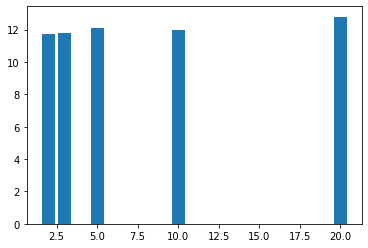

In [ ]:
plt.bar([2, 3, 5, 10, 20], average_training_time)

## Problem 4


In [ ]:
def sigmoid(x):
    # TODO
    return 1/(1+np.exp(-x))

def ReLU(x):
    return x * (x > 0)

class SmallNet:
    def __init__(self, in_features, num_hidden, dtype=np.float32, activation_function='sigmoid'):
        self.W1 = np.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = np.zeros((num_hidden,), dtype=dtype)
        self.W2 = np.zeros((1, num_hidden), dtype=dtype)
        self.b2 = np.zeros((1,), dtype=dtype)
        if activation_function == 'sigmoid':
            self.activation_function = sigmoid
            self.string_activation_function = 'sigmoid'
        else:
            self.activation_function = ReLU
            self.string_activation_function = 'ReLU'
        self.init_params()

    def init_params(self):
        # TODO for Problem 2:
        # set all parameters to small random values, e.g. from N(0, 0.5)
        self.W1 = np.random.normal(0, 0.5, size=(self.W1.shape))
        self.W2 = np.random.normal(0, 0.5, size=(self.W2.shape))
        self.b1 = np.random.normal(0, 0.5, size=(self.b1.shape))
        self.b2 = np.random.normal(0, 0.5, size=(self.b2.shape))

    def forward(self, X, Y=None, do_backward=False):
        verbose = False
        # TODO Problem 1: Fill in details of forward propagation

        # Input to neurons in 1st layer
        A1 = X @ self.W1.T + self.b1
        # Outputs after the sigmoid non-linearity
        O1 = self.activation_function(A1)
        # Inputs to neuron in the second layer
        A2 = O1 @ self.W2.T + self.b2
        # Outputs after the sigmoid non-linearity
        O2 = sigmoid(A2)

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            # with np.errstate(divide='ignore', invalid='ignore'):
            loss = -Y * np.log(O2) - (1 - Y) * np.log(
                1.0 - O2)
            # loss = TODO cross-entropy loss
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            # TODO in Problem 2:
            # fill in the gradient computation
            # Please note, that there is a correspondance between
            # the forward and backward pass: with backward computations happening
            # in reverse order.
            # We save the gradients with respect to the parameters as fields of self.
            # It is not very elegant, but simplifies training code later on.

            # A2_grad is the gradient of loss with respect to A2
            # Hint: there is a concise formula for the gradient
            # of logistic sigmoid and cross-entropy loss


            # n x 1
            A2_grad = (O2 - Y) / X.shape[0]

            # 1
            self.b2_grad = A2_grad.sum(0)

            # 1 x n @ n x hidden = 1 x hidden
            self.W2_grad = A2_grad.reshape(1, -1) @ O1

            # n x 1 @ 1 x h = n x h
            O1_grad = A2_grad @ self.W2

            # n x h
            if self.string_activation_function == 'sigmoid':
                A1_grad = O1_grad * sigmoid(A1) * (1 - sigmoid(A1))
            else:
                A1_grad = O1_grad * (A1 > 0)

            # n x 1
            self.b1_grad = A1_grad.sum(0)

            # h x n @ n x d = h x d
            self.W1_grad = A1_grad.T @ X

        return O2, loss

In [ ]:
import time

X3 = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=np.float32)
Y3 = np.array([[0], [1], [1], [0], [1], [0], [0], [1]], dtype=np.float32)

alpha = 0.1
num_of_trainings = 10
iters = 100000
fractions = []
mean_loss = []
fractions_close_to_Y = []
tolerance = 0.05
average_training_time = []
for hidden_dim in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    # TODO: run a few trainings and record the fraction of successful ones
    count_success = 0
    count_close = 0
    sum_loss = 0
    sum_time = 0
    for i in range(num_of_trainings):
        start = time.time()
        net = SmallNet(3, hidden_dim, dtype=np.float64, activation_function='ReLU')
        for i in range(iters):
            _, loss = net.forward(X3, Y3, do_backward=True)
            for param_name in ["W1", "b1", "W2", "b2"]:
                param = getattr(net, param_name)
                param[:] = param - alpha * getattr(
                    net, param_name + "_grad")
        end = time.time()
        predictions, loss = net.forward(X3, Y3, do_backward=True)
        if all(np.abs(Y3 - predictions) < 0.5):
            count_success += 1
        if all(np.abs(Y3 - predictions) < tolerance):
            count_close += 1
        sum_loss += loss
        sum_time += end-start
    average_training_time.append(sum_time / num_of_trainings)
    mean_loss.append(sum_loss / num_of_trainings)
    fractions_close_to_Y.append(count_close / num_of_trainings)
    fractions.append(count_success / num_of_trainings)

In [ ]:
print(f"Mean loss: {mean_loss}\nFraction of close to Y: {fractions_close_to_Y}\nFraction of correct choice: {fractions}\nAverage training time: {average_training_time}")

Mean loss: [0.5889650054547395, 0.4378656570186264, 0.347872711039003, 0.24711572992758643, 0.10417368618596475, 0.12147509882096777, 0.1366250920406314, 0.034768561801109626, 0.03477591122056322]
Fraction of close to Y: [0.0, 0.1, 0.3, 0.4, 0.7, 0.7, 0.7, 0.9, 0.9]
Fraction of correct choice: [0.0, 0.1, 0.3, 0.4, 0.7, 0.7, 0.7, 0.9, 0.9]
Average training time: [10.326007318496703, 9.62749080657959, 10.543533658981323, 9.640934705734253, 9.907688331604003, 10.044956517219543, 9.898870038986207, 10.098483848571778, 9.988899207115173]


<BarContainer object of 9 artists>

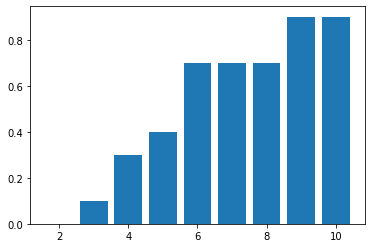

In [ ]:
plt.bar([2, 3, 4, 5, 6, 7, 8, 9, 10], fractions)

<BarContainer object of 9 artists>

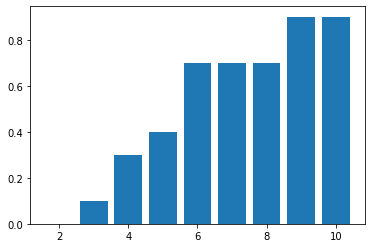

In [ ]:
plt.bar([2, 3, 4, 5, 6, 7, 8, 9, 10], fractions_close_to_Y)

<BarContainer object of 9 artists>

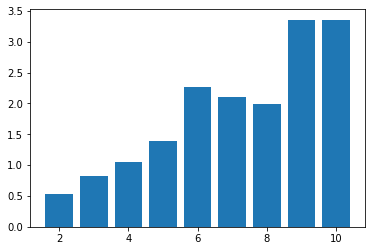

In [ ]:
plt.bar([2, 3, 4, 5, 6, 7, 8, 9, 10], -np.log(mean_loss))

<BarContainer object of 9 artists>

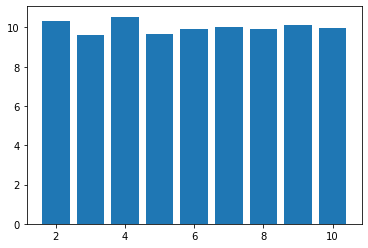

In [ ]:
plt.bar([2, 3, 4, 5, 6, 7, 8, 9, 10], average_training_time)

In [ ]:
import time

X3 = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=np.float32)
Y3 = np.array([[0], [1], [1], [0], [1], [0], [0], [1]], dtype=np.float32)

alpha = 0.1
num_of_trainings = 10
iters = 100000
fractions = []
mean_loss = []
fractions_close_to_Y = []
tolerance = 0.05
average_training_time = []
for hidden_dim in [11, 12, 13, 14]:
    # TODO: run a few trainings and record the fraction of successful ones
    count_success = 0
    count_close = 0
    sum_loss = 0
    sum_time = 0
    for i in range(num_of_trainings):
        start = time.time()
        net = SmallNet(3, hidden_dim, dtype=np.float64, activation_function='ReLU')
        for i in range(iters):
            _, loss = net.forward(X3, Y3, do_backward=True)
            for param_name in ["W1", "b1", "W2", "b2"]:
                param = getattr(net, param_name)
                param[:] = param - alpha * getattr(
                    net, param_name + "_grad")
        end = time.time()
        predictions, loss = net.forward(X3, Y3, do_backward=True)
        if all(np.abs(Y3 - predictions) < 0.5):
            count_success += 1
        if all(np.abs(Y3 - predictions) < tolerance):
            count_close += 1
        sum_loss += loss
        sum_time += end-start
    average_training_time.append(sum_time / num_of_trainings)
    mean_loss.append(sum_loss / num_of_trainings)
    fractions_close_to_Y.append(count_close / num_of_trainings)
    fractions.append(count_success / num_of_trainings)

In [ ]:
print(f"Mean loss: {mean_loss}\nFraction of close to Y: {fractions_close_to_Y}\nFraction of correct choice: {fractions}\nAverage training time: {average_training_time}")

Mean loss: [0.0001360194857072926, 0.034767186397057885, 0.00012472332258974247, 0.00012094739367293913]
Fraction of close to Y: [1.0, 0.9, 1.0, 1.0]
Fraction of correct choice: [1.0, 0.9, 1.0, 1.0]
Average training time: [9.606449580192566, 9.584927368164063, 9.628153777122497, 9.631801009178162]


<BarContainer object of 4 artists>

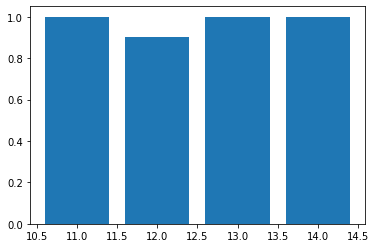

In [ ]:
plt.bar([11, 12, 13, 14], fractions)

<BarContainer object of 4 artists>

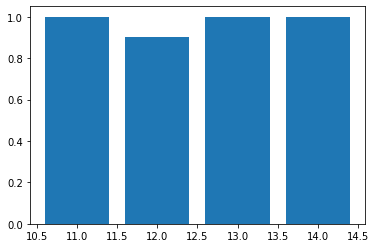

In [ ]:
plt.bar([11, 12, 13, 14], fractions_close_to_Y)

<BarContainer object of 4 artists>

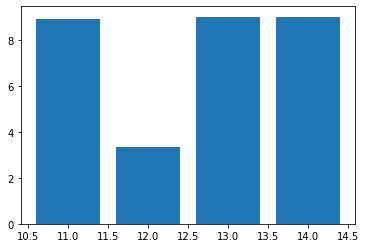

In [ ]:
plt.bar([11, 12, 13, 14], -np.log(mean_loss))

<BarContainer object of 4 artists>

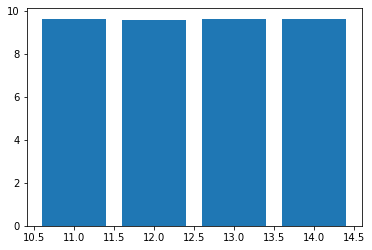

In [ ]:
plt.bar([11, 12, 13, 14], average_training_time)

From the above plots we see that the smallest network that learnt with 100% reliability had 11 neurons. However the network with 12 neurons learnt with only 90%. Networks with 13 and 14 neurons had again 100% reliability. Computation times were fairly similar.

## Problem 5

In [ ]:
def sigmoid(x):
    # TODO
    return 1/(1+np.exp(-x))

def ReLU(x):
    return x * (x > 0)

class SmallNet:
    def __init__(self, in_features, num_hidden, dtype=np.float32, activation_function='sigmoid'):
        self.W1 = np.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = np.zeros((num_hidden,), dtype=dtype)
        self.W2 = np.zeros((num_hidden, num_hidden), dtype=dtype)
        self.b2 = np.zeros((num_hidden,), dtype=dtype)
        self.W3 = np.zeros((1, num_hidden), dtype=dtype)
        self.b3 = np.zeros((1,), dtype=dtype)
        if activation_function == 'sigmoid':
            self.activation_function = sigmoid
            self.string_activation_function = 'sigmoid'
        else:
            self.activation_function = ReLU
            self.string_activation_function = 'ReLU'
        self.init_params()

    def init_params(self):
        # TODO for Problem 2:
        # set all parameters to small random values, e.g. from N(0, 0.5)
        self.W1 = np.random.normal(0, 0.5, size=(self.W1.shape))
        self.W2 = np.random.normal(0, 0.5, size=(self.W2.shape))
        self.W3 = np.random.normal(0, 0.5, size=(self.W3.shape))
        self.b1 = np.random.normal(0, 0.5, size=(self.b1.shape))
        self.b2 = np.random.normal(0, 0.5, size=(self.b2.shape))
        self.b3 = np.random.normal(0, 0.5, size=(self.b3.shape))

    def forward(self, X, Y=None, do_backward=False):
        # TODO Problem 1: Fill in details of forward propagation

        A1 = X @ self.W1.T + self.b1
        O1 = self.activation_function(A1)
        A2 = O1 @ self.W2.T + self.b2
        O2 = self.activation_function(A2)
        A3 = O2 @ self.W3.T + self.b3
        O3 = sigmoid(A3)
        # print(f"A1: {A1.shape}\nA2: {A2.shape}\nA31: {A3.shape}\n")

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            # with np.errstate(divide='ignore', invalid='ignore'):
            loss = -Y * np.log(O3) - (1 - Y) * np.log(
                1.0 - O3)
            # loss = TODO cross-entropy loss
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            # TODO in Problem 2:
            # fill in the gradient computation
            # Please note, that there is a correspondance between
            # the forward and backward pass: with backward computations happening
            # in reverse order.
            # We save the gradients with respect to the parameters as fields of self.
            # It is not very elegant, but simplifies training code later on.

            # A2_grad is the gradient of loss with respect to A2
            # Hint: there is a concise formula for the gradient
            # of logistic sigmoid and cross-entropy loss


            # n x 1
            A3_grad = (O3 - Y) / X.shape[0]

            # 1
            self.b3_grad = A3_grad.sum(0)

            # 1 x n @ n x hidden = 1 x hidden
            self.W3_grad = A3_grad.T @ O2

            # n x 1 @ 1 x h = n x h
            O2_grad = A3_grad @ self.W3

            # n x h
            if self.string_activation_function == 'sigmoid':
                A2_grad = O2_grad * sigmoid(A2) * (1 - sigmoid(A2))
            else:
                A2_grad = O2_grad * (A2 > 0)

            # 1 x h
            self.b2_grad = A2_grad.sum(0)

            # n x h @ h x h = n x h
            self.W2_grad = A2_grad.T @ O1

            O1_grad = A2_grad @ self.W2

            # n x h
            if self.string_activation_function == 'sigmoid':
                A1_grad = O1_grad * sigmoid(A1) * (1 - sigmoid(A1))
            else:
                A1_grad = O1_grad * (A1 > 0)

            self.b1_grad = A1_grad.sum(0)

            # h x n @ n x d = h x d
            self.W1_grad = A1_grad.T @ X

        return O3, loss

In [ ]:
X3 = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=np.float32)
Y3 = np.array([[0], [1], [1], [0], [1], [0], [0], [1]], dtype=np.float32)

net = SmallNet(3, 10, dtype=np.float64, activation_function="sigmoid")

alpha = 0.1  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X3, Y3, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2", "W3", "b3"]:
        param = getattr(net, param_name)
        param[:] = param - alpha * getattr(
            net, param_name + "_grad")

after 0 steps 	loss=0.7060335607146981
after 5000 steps 	loss=0.6930083573290969
after 10000 steps 	loss=0.692207246358786
after 15000 steps 	loss=0.6188614754023005
after 20000 steps 	loss=0.006445268739739276
after 25000 steps 	loss=0.0023189980191165643
after 30000 steps 	loss=0.0013563814889259152
after 35000 steps 	loss=0.0009430940659476014
after 40000 steps 	loss=0.0007167168111642903
after 45000 steps 	loss=0.0005749874935995059
after 50000 steps 	loss=0.0004783936051063502
after 55000 steps 	loss=0.0004085748188840702
after 60000 steps 	loss=0.00035588348621228987
after 65000 steps 	loss=0.00031478213026771176
after 70000 steps 	loss=0.0002818732070195796
after 75000 steps 	loss=0.0002549603622830515
after 80000 steps 	loss=0.0002325627656028653
after 85000 steps 	loss=0.00021364684331856606
after 90000 steps 	loss=0.00019746996670923816
after 95000 steps 	loss=0.00018348523392989742


In [ ]:
predictions, loss = net.forward(X3, Y3, do_backward=True)
for x, p in zip(X3, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet([0. 0. 0.]) = 0.0001452492885344106
XORnet([0. 0. 1.]) = 0.9998096905309405
XORnet([0. 1. 0.]) = 0.9997880513019968
XORnet([0. 1. 1.]) = 0.00015030526710365898
XORnet([1. 0. 0.]) = 0.9998177698487393
XORnet([1. 0. 1.]) = 0.00015484303284973413
XORnet([1. 1. 0.]) = 0.0002305861731808059
XORnet([1. 1. 1.]) = 0.9998953451999503


In [ ]:
X3 = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=np.float32)
Y3 = np.array([[0], [1], [1], [0], [1], [0], [0], [1]], dtype=np.float32)

net = SmallNet(3, 10, dtype=np.float64, activation_function="ReLU")

alpha = 0.1  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X3, Y3, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2", "W3", "b3"]:
        param = getattr(net, param_name)
        param[:] = param - alpha * getattr(
            net, param_name + "_grad")

after 0 steps 	loss=1.337206013085355
after 5000 steps 	loss=0.0005533979581704639
after 10000 steps 	loss=0.00021106050492154829
after 15000 steps 	loss=0.00012304619764201194
after 20000 steps 	loss=8.526903800949612e-05
after 25000 steps 	loss=6.458631809435028e-05
after 30000 steps 	loss=5.162036917174169e-05
after 35000 steps 	loss=4.278348288965385e-05
after 40000 steps 	loss=3.640172046361411e-05
after 45000 steps 	loss=3.1592659171492175e-05
after 50000 steps 	loss=2.7846560828131342e-05
after 55000 steps 	loss=2.4853194585816238e-05
after 60000 steps 	loss=2.2410940054849756e-05
after 65000 steps 	loss=2.0381687739369957e-05
after 70000 steps 	loss=1.8671226940485086e-05
after 75000 steps 	loss=1.7212445205066007e-05
after 80000 steps 	loss=1.5951954602812352e-05
after 85000 steps 	loss=1.485557718391678e-05
after 90000 steps 	loss=1.3891421018009477e-05
after 95000 steps 	loss=1.3039102335645946e-05


In [ ]:
predictions, loss = net.forward(X3, Y3, do_backward=True)
for x, p in zip(X3, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet([0. 0. 0.]) = 1.1571456488175808e-05
XORnet([0. 0. 1.]) = 0.9999887706394818
XORnet([0. 1. 0.]) = 0.9999935051390999
XORnet([0. 1. 1.]) = 2.0287166271329723e-05
XORnet([1. 0. 0.]) = 0.9999931719266621
XORnet([1. 0. 1.]) = 1.1669082495888446e-05
XORnet([1. 1. 0.]) = 1.0630510228763685e-05
XORnet([1. 1. 1.]) = 0.9999804766518238


In [ ]:
import time

X3 = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=np.float32)
Y3 = np.array([[0], [1], [1], [0], [1], [0], [0], [1]], dtype=np.float32)

alpha = 0.1
num_of_trainings = 10
iters = 100000
fractions = []
mean_loss = []
fractions_close_to_Y = []
tolerance = 0.05
average_training_time = []
for hidden_dim in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    # TODO: run a few trainings and record the fraction of successful ones
    count_success = 0
    count_close = 0
    sum_loss = 0
    sum_time = 0
    for i in range(num_of_trainings):
        start = time.time()
        net = SmallNet(3, hidden_dim, dtype=np.float64, activation_function='sigmoid')
        for i in range(iters):
            _, loss = net.forward(X3, Y3, do_backward=True)
            for param_name in ["W1", "b1", "W2", "b2", "W3", "b3"]:
                param = getattr(net, param_name)
                param[:] = param - alpha * getattr(
                    net, param_name + "_grad")
        end = time.time()
        predictions, loss = net.forward(X3, Y3, do_backward=True)
        if all(np.abs(Y3 - predictions) < 0.5):
            count_success += 1
        if all(np.abs(Y3 - predictions) < tolerance):
            count_close += 1
        sum_loss += loss
        sum_time += end-start
    average_training_time.append(sum_time / num_of_trainings)
    mean_loss.append(sum_loss / num_of_trainings)
    fractions_close_to_Y.append(count_close / num_of_trainings)
    fractions.append(count_success / num_of_trainings)

In [ ]:
print(f"Mean loss: {mean_loss}\nFraction of close to Y: {fractions_close_to_Y}\nFraction of correct choice: {fractions}\nAverage training time: {average_training_time}")

Mean loss: [0.34852661723795136, 0.06980055190214957, 0.06259387765682073, 0.00022541766804462954, 0.00017776251624857957, 0.00021169483583561097, 0.00015481613053726256, 0.00013873291959761678, 0.00013948694049702246]
Fraction of close to Y: [0.4, 0.9, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Fraction of correct choice: [0.4, 0.9, 0.9, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Average training time: [10.564104700088501, 10.694225001335145, 12.180380582809448, 12.345931220054627, 12.463910269737244, 12.629656219482422, 12.692356324195861, 12.878463888168335, 12.995995879173279]


<BarContainer object of 9 artists>

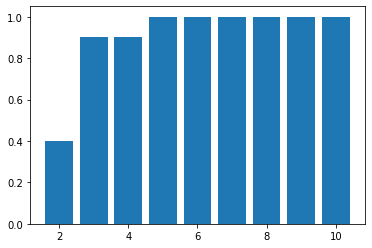

In [ ]:
plt.bar([2, 3, 4, 5, 6, 7, 8, 9, 10], fractions)

<BarContainer object of 9 artists>

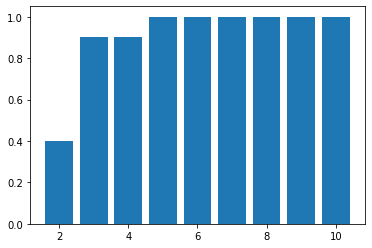

In [ ]:
plt.bar([2, 3, 4, 5, 6, 7, 8, 9, 10], fractions_close_to_Y)

<BarContainer object of 9 artists>

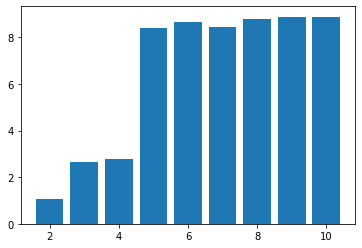

In [ ]:
plt.bar([2, 3, 4, 5, 6, 7, 8, 9, 10], -np.log(mean_loss))

<BarContainer object of 9 artists>

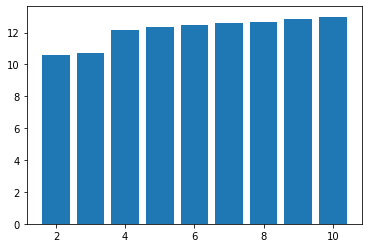

In [ ]:
plt.bar([2, 3, 4, 5, 6, 7, 8, 9, 10], average_training_time)

In [ ]:
import time

X3 = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=np.float32)
Y3 = np.array([[0], [1], [1], [0], [1], [0], [0], [1]], dtype=np.float32)

alpha = 0.1
num_of_trainings = 10
iters = 100000
fractions = []
mean_loss = []
fractions_close_to_Y = []
tolerance = 0.05
average_training_time = []
for hidden_dim in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    # TODO: run a few trainings and record the fraction of successful ones
    count_success = 0
    count_close = 0
    sum_loss = 0
    sum_time = 0
    for i in range(num_of_trainings):
        start = time.time()
        net = SmallNet(3, hidden_dim, dtype=np.float64, activation_function='ReLU')
        for i in range(iters):
            _, loss = net.forward(X3, Y3, do_backward=True)
            for param_name in ["W1", "b1", "W2", "b2", "W3", "b3"]:
                param = getattr(net, param_name)
                param[:] = param - alpha * getattr(
                    net, param_name + "_grad")
        end = time.time()
        predictions, loss = net.forward(X3, Y3, do_backward=True)
        if all(np.abs(Y3 - predictions) < 0.5):
            count_success += 1
        if all(np.abs(Y3 - predictions) < tolerance):
            count_close += 1
        sum_loss += loss
        sum_time += end-start
    average_training_time.append(sum_time / num_of_trainings)
    mean_loss.append(sum_loss / num_of_trainings)
    fractions_close_to_Y.append(count_close / num_of_trainings)
    fractions.append(count_success / num_of_trainings)

In [ ]:
print(f"Mean loss: {mean_loss}\nFraction of close to Y: {fractions_close_to_Y}\nFraction of correct choice: {fractions}\nAverage training time: {average_training_time}")

Mean loss: [0.385698898962244, 0.21607221431817125, 0.1088435212854842, 0.04122214472632687, 0.05943576329296901, 0.028150567905300884, 0.028128961736465202, 3.277890849744982e-05, 1.4340979006941264e-05]
Fraction of close to Y: [0.1, 0.4, 0.6, 0.8, 0.8, 0.9, 0.9, 1.0, 1.0]
Fraction of correct choice: [0.1, 0.4, 0.6, 0.8, 0.8, 0.9, 0.9, 1.0, 1.0]
Average training time: [8.839181303977966, 8.514445447921753, 9.540779781341552, 9.664786958694458, 9.738471961021423, 9.734434294700623, 9.754486274719238, 9.85719358921051, 9.85113604068756]


<BarContainer object of 9 artists>

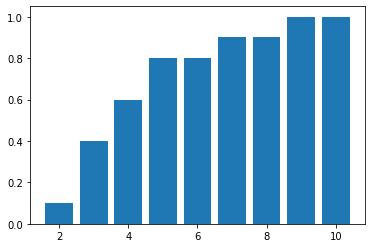

In [ ]:
plt.bar([2, 3, 4, 5, 6, 7, 8, 9, 10], fractions)

<BarContainer object of 9 artists>

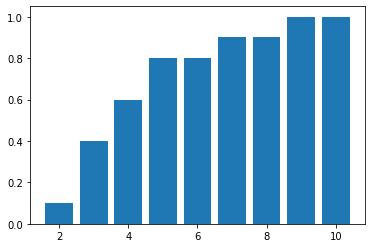

In [ ]:
plt.bar([2, 3, 4, 5, 6, 7, 8, 9, 10], fractions_close_to_Y)

<BarContainer object of 9 artists>

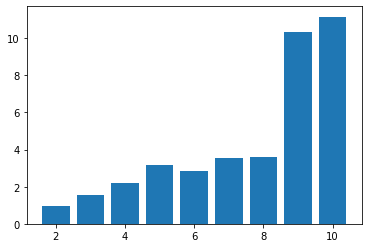

In [ ]:
plt.bar([2, 3, 4, 5, 6, 7, 8, 9, 10], -np.log(mean_loss))

<BarContainer object of 9 artists>

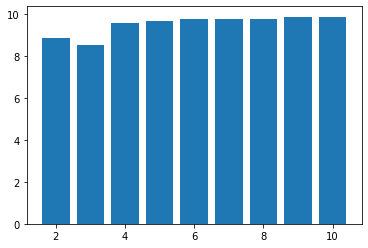

In [ ]:
plt.bar([2, 3, 4, 5, 6, 7, 8, 9, 10], average_training_time)

## Problem 6

In [ ]:
def sigmoid(x):
    # TODO
    return 1/(1+np.exp(-x))

def ReLU(x):
    return x * (x > 0)

class SmallNet:
    def __init__(self, in_features, num_hidden, num_layers, dtype=np.float32, activation_function='sigmoid'):
        self.num_layers = num_layers
        self.dtype = dtype
        self.num_hidden = num_hidden
        self.in_features = in_features

        self.W1 = np.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = np.zeros((num_hidden,), dtype=dtype)

        self.W2 = np.zeros((num_layers - 1, num_hidden, num_hidden), dtype=dtype)
        self.b2 = np.zeros((num_layers - 1, num_hidden,), dtype=dtype)

        # self.W2 = np.zeros((num_hidden, num_hidden), dtype=dtype)
        # self.b2 = np.zeros((num_hidden,), dtype=dtype)

        self.W3 = np.zeros((1, num_hidden), dtype=dtype)
        self.b3 = np.zeros((1,), dtype=dtype)

        if activation_function == 'sigmoid':
            self.activation_function = sigmoid
            self.string_activation_function = 'sigmoid'
        else:
            self.activation_function = ReLU
            self.string_activation_function = 'ReLU'
        self.init_params()

    def init_params(self):
        self.W1 = np.random.normal(0, 0.5, size=(self.W1.shape))
        self.W2 = np.random.normal(0, 0.5, size=(self.W2.shape))
        self.W3 = np.random.normal(0, 0.5, size=(self.W3.shape))
        self.b1 = np.random.normal(0, 0.5, size=(self.b1.shape))
        self.b2 = np.random.normal(0, 0.5, size=(self.b2.shape))
        self.b3 = np.random.normal(0, 0.5, size=(self.b3.shape))

    def forward(self, X, Y=None, do_backward=False):
        # TODO Problem 1: Fill in details of forward propagation

        A1 = X @ self.W1.T + self.b1
        O1 = self.activation_function(A1)
        A2 = np.zeros((self.num_layers - 1, A1.shape[0], A1.shape[1]), dtype=self.dtype)
        O2 = np.zeros((self.num_layers - 1, A1.shape[0], A1.shape[1]), dtype=self.dtype)
        A2[0] = O1 @ self.W2[0].T + self.b2[0]
        O2[0] = self.activation_function(A2[0])
        for i in range(1,self.num_layers - 1):
            A2[i] = O2[i-1] @ self.W2[i].T + self.b2[i]
            O2[i] = self.activation_function(A2[i])
        
        # A2 = O1 @ self.W2.T + self.b2
        # O2 = self.activation_function(A2)

        # Case of single layer
        if self.num_layers == 1:
            A3 = O1 @ self.W3.T + self.b3
        else:
            A3 = O2[-1] @ self.W3.T + self.b3
        O3 = sigmoid(A3)

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            # with np.errstate(divide='ignore', invalid='ignore'):
            loss = -Y * np.log(O3) - (1 - Y) * np.log(
                1.0 - O3)
            # loss = TODO cross-entropy loss
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            
            # Declarations
            A2_grad = np.zeros((self.num_layers - 1, A1.shape[0], A1.shape[1]), dtype=self.dtype)
            O2_grad = np.zeros((self.num_layers - 1, A1.shape[0], A1.shape[1]), dtype=self.dtype)
            self.W2_grad = np.zeros((self.num_layers - 1, self.num_hidden, self.num_hidden), dtype=self.dtype)
            self.b2_grad = np.zeros((self.num_layers - 1, self.num_hidden,), dtype=self.dtype)

            # n x 1
            A3_grad = (O3 - Y) / X.shape[0]

            # 1
            self.b3_grad = A3_grad.sum(0)

            # 1 x n @ n x hidden = 1 x hidden
            self.W3_grad = A3_grad.T @ O2[-1]
            # self.W3_grad = A3_grad.T @ O2

            # n x 1 @ 1 x h = n x h
            O2_grad[-1] = A3_grad @ self.W3
            # O2_grad = A3_grad @ self.W3
            
            # range(self.num_layers - 2, 0, -1) is an interval <num_layers - 2, 0) = <num_layers - 2, 1>
            for i in range(self.num_layers - 2, 0, -1):
                if self.string_activation_function == 'sigmoid':
                    A2_grad[i] = O2_grad[i] * sigmoid(A2[i]) * (1 - sigmoid(A2[i]))
                else:
                    A2_grad[i] = O2_grad[i] * (A2[i] > 0)
                self.b2_grad[i] = A2_grad[i].sum(0)
                self.W2_grad[i] = A2_grad[i].T @ O2[i-1]
                O2_grad[i-1] = A2_grad[i] @ self.W2[i]
                

            # n x h
            if self.string_activation_function == 'sigmoid':
                A2_grad[0] = O2_grad[0] * sigmoid(A2[0]) * (1 - sigmoid(A2[0]))
            else:
                A2_grad[0] = O2_grad[0] * (A2[0] > 0)

            # 1 x h
            self.b2_grad[0] = A2_grad[0].sum(0)

            # n x h @ h x h = n x h
            self.W2_grad[0] = A2_grad[0].T @ O1

            O1_grad = A2_grad[0] @ self.W2[0]

            # n x h
            if self.string_activation_function == 'sigmoid':
                A1_grad = O1_grad * sigmoid(A1) * (1 - sigmoid(A1))
            else:
                A1_grad = O1_grad * (A1 > 0)

            self.b1_grad = A1_grad.sum(0)

            # h x n @ n x d = h x d
            self.W1_grad = A1_grad.T @ X

        return O3, loss

In [ ]:
X3 = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=np.float32)
Y3 = np.array([[0], [1], [1], [0], [1], [0], [0], [1]], dtype=np.float32)

net = SmallNet(3, 10, 3, dtype=np.float64, activation_function="sigmoid")

alpha = 0.1  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X3, Y3, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2", "W3", "b3"]:
        param = getattr(net, param_name)
        param[:] = param - alpha * getattr(
            net, param_name + "_grad")

after 0 steps 	loss=0.8582016781457171
after 5000 steps 	loss=0.6928302996927421
after 10000 steps 	loss=0.6914011640977771
after 15000 steps 	loss=0.2943468099245298
after 20000 steps 	loss=0.002525110384115678
after 25000 steps 	loss=0.0010563273652655016
after 30000 steps 	loss=0.0006479035782774793
after 35000 steps 	loss=0.0004614475541427736
after 40000 steps 	loss=0.00035594354892847435
after 45000 steps 	loss=0.0002885209730305701
after 50000 steps 	loss=0.00024190713394361724
after 55000 steps 	loss=0.00020785275483181813
after 60000 steps 	loss=0.00018193736418457178
after 65000 steps 	loss=0.00016158584107410116
after 70000 steps 	loss=0.0001451996517367669
after 75000 steps 	loss=0.0001317355763410597
after 80000 steps 	loss=0.00012048468908693323
after 85000 steps 	loss=0.00011094886777134477
after 90000 steps 	loss=0.00010276814694151827
after 95000 steps 	loss=9.567610262274975e-05


In [ ]:
predictions, loss = net.forward(X3, Y3, do_backward=True)
for x, p in zip(X3, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet([0. 0. 0.]) = 9.51502693728701e-05
XORnet([0. 0. 1.]) = 0.9999147715560204
XORnet([0. 1. 0.]) = 0.9998933315272492
XORnet([0. 1. 1.]) = 7.631733110147609e-05
XORnet([1. 0. 0.]) = 0.9999167156805825
XORnet([1. 0. 1.]) = 0.00013734698020321555
XORnet([1. 1. 0.]) = 7.652826184451539e-05
XORnet([1. 1. 1.]) = 0.9999447867195244


In [ ]:
X3 = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=np.float32)
Y3 = np.array([[0], [1], [1], [0], [1], [0], [0], [1]], dtype=np.float32)

net = SmallNet(3, 10, 4, dtype=np.float64, activation_function="sigmoid")

alpha = 0.1  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X3, Y3, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2", "W3", "b3"]:
        param = getattr(net, param_name)
        param[:] = param - alpha * getattr(
            net, param_name + "_grad")

after 0 steps 	loss=0.7187858484355718
after 5000 steps 	loss=0.693092228177208
after 10000 steps 	loss=0.6930499102391195
after 15000 steps 	loss=0.6929693627169183
after 20000 steps 	loss=0.6927638070536685
after 25000 steps 	loss=0.6917767260380565
after 30000 steps 	loss=0.5054979029522598
after 35000 steps 	loss=0.0018702050345262523
after 40000 steps 	loss=0.0008276623049592769
after 45000 steps 	loss=0.000524790005140959
after 50000 steps 	loss=0.0003822543519517663
after 55000 steps 	loss=0.00029978564310538026
after 60000 steps 	loss=0.0002461645519020626
after 65000 steps 	loss=0.00020857062470882353
after 70000 steps 	loss=0.00018078419557911467
after 75000 steps 	loss=0.000159428022144019
after 80000 steps 	loss=0.0001425121960230052
after 85000 steps 	loss=0.00012878910977603167
after 90000 steps 	loss=0.00011743735688648932
after 95000 steps 	loss=0.00010789432779765936


In [ ]:
predictions, loss = net.forward(X3, Y3, do_backward=True)
for x, p in zip(X3, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet([0. 0. 0.]) = 9.591660766489904e-05
XORnet([0. 0. 1.]) = 0.999898632704567
XORnet([0. 1. 0.]) = 0.9998616492075727
XORnet([0. 1. 1.]) = 7.462180684897843e-05
XORnet([1. 0. 0.]) = 0.9998870655272678
XORnet([1. 0. 1.]) = 0.00011277764684413542
XORnet([1. 1. 0.]) = 6.949690154287386e-05
XORnet([1. 1. 1.]) = 0.999907411978752


In [ ]:
X3 = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=np.float32)
Y3 = np.array([[0], [1], [1], [0], [1], [0], [0], [1]], dtype=np.float32)

net = SmallNet(3, 10, 5, dtype=np.float64, activation_function="sigmoid")

alpha = 0.1  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X3, Y3, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2", "W3", "b3"]:
        param = getattr(net, param_name)
        param[:] = param - alpha * getattr(
            net, param_name + "_grad")

after 0 steps 	loss=0.6931224862543106
after 5000 steps 	loss=0.693111523373899
after 10000 steps 	loss=0.6930959823916376
after 15000 steps 	loss=0.6930720351093502
after 20000 steps 	loss=0.6930318285854749
after 25000 steps 	loss=0.6929558733220772
after 30000 steps 	loss=0.6927821524972657
after 35000 steps 	loss=0.6921843954850311
after 40000 steps 	loss=0.6823998404663545
after 45000 steps 	loss=0.0037630460169763764
after 50000 steps 	loss=0.0008223085912821692
after 55000 steps 	loss=0.00045078074743022363
after 60000 steps 	loss=0.0003088092565718182
after 65000 steps 	loss=0.00023432553074615375
after 70000 steps 	loss=0.00018857446476314597
after 75000 steps 	loss=0.00015766408257981605
after 80000 steps 	loss=0.0001354010347967986
after 85000 steps 	loss=0.00011861180795179677
after 90000 steps 	loss=0.00010550403031719735
after 95000 steps 	loss=9.498962321662737e-05


In [ ]:
predictions, loss = net.forward(X3, Y3, do_backward=True)
for x, p in zip(X3, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet([0. 0. 0.]) = 8.01511540100622e-05
XORnet([0. 0. 1.]) = 0.9999096072705914
XORnet([0. 1. 0.]) = 0.9998918819640314
XORnet([0. 1. 1.]) = 6.996471901566262e-05
XORnet([1. 0. 0.]) = 0.9999156991765451
XORnet([1. 0. 1.]) = 0.00011739000934154806
XORnet([1. 1. 0.]) = 7.576826582243795e-05
XORnet([1. 1. 1.]) = 0.999935155363538


From above results we see that for 3-5 layers network can be trained correctly. From below computations and plots we can see that network with 6 layers is probably not trainable for this problem.

In [ ]:
X3 = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=np.float32)
Y3 = np.array([[0], [1], [1], [0], [1], [0], [0], [1]], dtype=np.float32)

net = SmallNet(3, 10, 6, dtype=np.float64, activation_function="sigmoid")

alpha = 0.1  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X3, Y3, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2", "W3", "b3"]:
        param = getattr(net, param_name)
        param[:] = param - alpha * getattr(
            net, param_name + "_grad")

after 0 steps 	loss=1.0161357789679943
after 5000 steps 	loss=0.6931491875387052
after 10000 steps 	loss=0.6931488169743534
after 15000 steps 	loss=0.6931484689316453
after 20000 steps 	loss=0.6931481380827816
after 25000 steps 	loss=0.6931478197276123
after 30000 steps 	loss=0.69314750960428
after 35000 steps 	loss=0.6931472037303903
after 40000 steps 	loss=0.6931468982628568
after 45000 steps 	loss=0.6931465893666703
after 50000 steps 	loss=0.6931462730838074
after 55000 steps 	loss=0.6931459451934843
after 60000 steps 	loss=0.6931456010539605
after 65000 steps 	loss=0.693145235413955
after 70000 steps 	loss=0.6931448421780524
after 75000 steps 	loss=0.693144414104582
after 80000 steps 	loss=0.6931439424051811
after 85000 steps 	loss=0.6931434162006198
after 90000 steps 	loss=0.6931428217640625
after 95000 steps 	loss=0.6931421414447565


In [ ]:
predictions, loss = net.forward(X3, Y3, do_backward=True)
for x, p in zip(X3, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet([0. 0. 0.]) = 0.5000045314986037
XORnet([0. 0. 1.]) = 0.4999910910303919
XORnet([0. 1. 0.]) = 0.500025546264762
XORnet([0. 1. 1.]) = 0.5000151183319379
XORnet([1. 0. 0.]) = 0.49998556071204825
XORnet([1. 0. 1.]) = 0.4999714520424375
XORnet([1. 1. 0.]) = 0.5000089028203659
XORnet([1. 1. 1.]) = 0.4999981375504652


In [ ]:
import time

X3 = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=np.float32)
Y3 = np.array([[0], [1], [1], [0], [1], [0], [0], [1]], dtype=np.float32)

alpha = 0.1
num_of_trainings = 10
iters = 100000
fractions = []
mean_loss = []
fractions_close_to_Y = []
tolerance = 0.05
average_training_time = []
for hidden_dim in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]:
    # TODO: run a few trainings and record the fraction of successful ones
    count_success = 0
    count_close = 0
    sum_loss = 0
    sum_time = 0
    for i in range(num_of_trainings):
        start = time.time()
        net = SmallNet(3, hidden_dim, 6, dtype=np.float64, activation_function='sigmoid')
        for i in range(iters):
            _, loss = net.forward(X3, Y3, do_backward=True)
            for param_name in ["W1", "b1", "W2", "b2", "W3", "b3"]:
                param = getattr(net, param_name)
                param[:] = param - alpha * getattr(
                    net, param_name + "_grad")
        end = time.time()
        predictions, loss = net.forward(X3, Y3, do_backward=True)
        if all(np.abs(Y3 - predictions) < 0.5):
            count_success += 1
        if all(np.abs(Y3 - predictions) < tolerance):
            count_close += 1
        sum_loss += loss
        sum_time += end-start
    average_training_time.append(sum_time / num_of_trainings)
    mean_loss.append(sum_loss / num_of_trainings)
    fractions_close_to_Y.append(count_close / num_of_trainings)
    fractions.append(count_success / num_of_trainings)

In [ ]:
print(f"Mean loss: {mean_loss}\nFraction of close to Y: {fractions_close_to_Y}\nFraction of correct choice: {fractions}\nAverage training time: {average_training_time}")

Mean loss: [0.6931471844869034, 0.693147141859008, 0.6931472665624357, 0.6931472125819375, 0.693147172380176, 0.6931463859392321, 0.6931460876615463, 0.6931478855463267, 0.6931477360001473, 0.6931418421971764, 0.6931464284778708]
Fraction of close to Y: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Fraction of correct choice: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Average training time: [27.054962682724, 27.392369675636292, 31.28450345993042, 31.946690440177917, 32.35499806404114, 32.80058081150055, 32.97307522296906, 33.53377442359924, 33.8717381477356, 34.50215241909027, 34.8730833530426]


<BarContainer object of 11 artists>

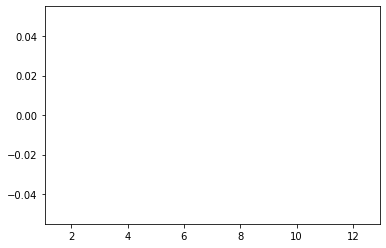

In [ ]:
plt.bar([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], fractions)

<BarContainer object of 11 artists>

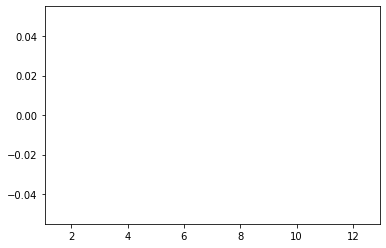

In [ ]:
plt.bar([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], fractions_close_to_Y)

<BarContainer object of 11 artists>

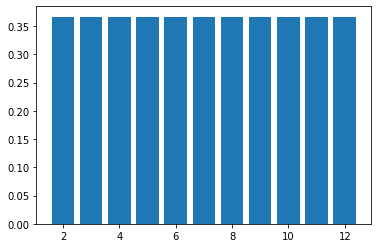

In [ ]:
plt.bar([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], -np.log(mean_loss))

<BarContainer object of 11 artists>

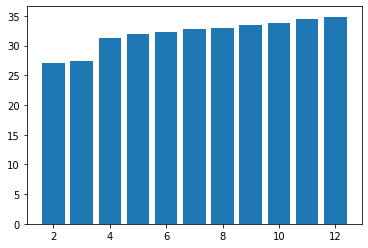

In [ ]:
plt.bar([2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], average_training_time)

## Problem 7

In [ ]:
def sigmoid(x):
    # TODO
    return 1/(1+np.exp(-x))

def ReLU(x):
    return x * (x > 0)

class SmallNet:
    def __init__(self, in_features, num_hidden, num_layers, dtype=np.float32, activation_function='sigmoid'):
        self.num_layers = num_layers
        self.dtype = dtype
        self.num_hidden = num_hidden
        self.in_features = in_features

        self.W1 = np.zeros((num_hidden, in_features), dtype=dtype)
        self.b1 = np.zeros((num_hidden,), dtype=dtype)

        self.W2 = np.zeros((num_layers - 1, num_hidden, num_hidden), dtype=dtype)
        self.b2 = np.zeros((num_layers - 1, num_hidden,), dtype=dtype)

        # self.W2 = np.zeros((num_hidden, num_hidden), dtype=dtype)
        # self.b2 = np.zeros((num_hidden,), dtype=dtype)

        self.W3 = np.zeros((1, num_hidden), dtype=dtype)
        self.b3 = np.zeros((1,), dtype=dtype)

        if activation_function == 'sigmoid':
            self.activation_function = sigmoid
            self.string_activation_function = 'sigmoid'
        else:
            self.activation_function = ReLU
            self.string_activation_function = 'ReLU'
        self.init_params()

    def init_params(self):
        self.W1 = np.random.normal(0, 0.5, size=(self.W1.shape))
        self.W2 = np.random.normal(0, 0.5, size=(self.W2.shape))
        self.W3 = np.random.normal(0, 0.5, size=(self.W3.shape))
        self.W1b = np.random.normal(0, 0.5, size=(self.W1.shape))
        self.W2b = np.random.normal(0, 0.5, size=(self.W2.shape))
        self.W3b = np.random.normal(0, 0.5, size=(self.W3.shape))
        self.b1 = np.random.normal(0, 0.5, size=(self.b1.shape))
        self.b2 = np.random.normal(0, 0.5, size=(self.b2.shape))
        self.b3 = np.random.normal(0, 0.5, size=(self.b3.shape))

    def forward(self, X, Y=None, do_backward=False):
        # TODO Problem 1: Fill in details of forward propagation

        A1 = X @ self.W1.T + self.b1
        O1 = self.activation_function(A1)
        A2 = np.zeros((self.num_layers - 1, A1.shape[0], A1.shape[1]), dtype=self.dtype)
        O2 = np.zeros((self.num_layers - 1, A1.shape[0], A1.shape[1]), dtype=self.dtype)
        A2[0] = O1 @ self.W2[0].T + self.b2[0]
        O2[0] = self.activation_function(A2[0])
        for i in range(1,self.num_layers - 1):
            A2[i] = O2[i-1] @ self.W2[i].T + self.b2[i]
            O2[i] = self.activation_function(A2[i])
        
        # A2 = O1 @ self.W2.T + self.b2
        # O2 = self.activation_function(A2)

        # Case of single layer
        if self.num_layers == 1:
            A3 = O1 @ self.W3.T + self.b3
        else:
            A3 = O2[-1] @ self.W3.T + self.b3
        O3 = sigmoid(A3)

        # When Y is none, simply return the predictions. Else compute the loss
        if Y is not None:
            # with np.errstate(divide='ignore', invalid='ignore'):
            loss = -Y * np.log(O3) - (1 - Y) * np.log(
                1.0 - O3)
            # loss = TODO cross-entropy loss
            # normalize loss by batch size
            loss = loss.sum() / X.shape[0]
        else:
            loss = np.nan

        if do_backward:
            
            # Declarations
            A2_grad = np.zeros((self.num_layers - 1, A1.shape[0], A1.shape[1]), dtype=self.dtype)
            O2_grad = np.zeros((self.num_layers - 1, A1.shape[0], A1.shape[1]), dtype=self.dtype)
            self.W2_grad = np.zeros((self.num_layers - 1, self.num_hidden, self.num_hidden), dtype=self.dtype)
            self.b2_grad = np.zeros((self.num_layers - 1, self.num_hidden,), dtype=self.dtype)

            # n x 1
            A3_grad = (O3 - Y) / X.shape[0]

            # 1
            self.b3_grad = A3_grad.sum(0)

            # 1 x n @ n x hidden = 1 x hidden
            self.W3_grad = A3_grad.T @ O2[-1]
            # self.W3_grad = A3_grad.T @ O2

            # n x 1 @ 1 x h = n x h
            O2_grad[-1] = A3_grad @ self.W3b
            # O2_grad = A3_grad @ self.W3
            
            # range(self.num_layers - 2, 0, -1) is an interval <num_layers - 2, 0) = <num_layers - 2, 1>
            for i in range(self.num_layers - 2, 0, -1):
                if self.string_activation_function == 'sigmoid':
                    A2_grad[i] = O2_grad[i] * sigmoid(A2[i]) * (1 - sigmoid(A2[i]))
                else:
                    A2_grad[i] = O2_grad[i] * (A2[i] > 0)
                self.b2_grad[i] = A2_grad[i].sum(0)
                self.W2_grad[i] = A2_grad[i].T @ O2[i-1]
                O2_grad[i-1] = A2_grad[i] @ self.W2b[i]
                

            # n x h
            if self.string_activation_function == 'sigmoid':
                A2_grad[0] = O2_grad[0] * sigmoid(A2[0]) * (1 - sigmoid(A2[0]))
            else:
                A2_grad[0] = O2_grad[0] * (A2[0] > 0)

            # 1 x h
            self.b2_grad[0] = A2_grad[0].sum(0)

            # n x h @ h x h = n x h
            self.W2_grad[0] = A2_grad[0].T @ O1

            O1_grad = A2_grad[0] @ self.W2b[0]

            # n x h
            if self.string_activation_function == 'sigmoid':
                A1_grad = O1_grad * sigmoid(A1) * (1 - sigmoid(A1))
            else:
                A1_grad = O1_grad * (A1 > 0)

            self.b1_grad = A1_grad.sum(0)

            # h x n @ n x d = h x d
            self.W1_grad = A1_grad.T @ X

        return O3, loss

Example of correctly trained network.

In [ ]:
X3 = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]], dtype=np.float32)
Y3 = np.array([[0], [1], [1], [0], [1], [0], [0], [1]], dtype=np.float32)

net = SmallNet(3, 10, 3, dtype=np.float64, activation_function="sigmoid")

alpha = 0.2  # set a learning rate

for i in range(100000):
    _, loss = net.forward(X3, Y3, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2", "W3", "b3"]:
        param = getattr(net, param_name)
        param[:] = param - alpha * getattr(
            net, param_name + "_grad")

after 0 steps 	loss=0.7320298573626398
after 5000 steps 	loss=0.6930894442817968
after 10000 steps 	loss=0.6930530916743842
after 15000 steps 	loss=0.6927439087374933
after 20000 steps 	loss=0.6914160561303024
after 25000 steps 	loss=0.6850093622540182
after 30000 steps 	loss=0.645293906970376
after 35000 steps 	loss=0.341680553360308
after 40000 steps 	loss=0.08372925140402193
after 45000 steps 	loss=0.03349880828380243
after 50000 steps 	loss=0.01885396820392495
after 55000 steps 	loss=0.012559667969060507
after 60000 steps 	loss=0.009204126485311588
after 65000 steps 	loss=0.007164868726266451
after 70000 steps 	loss=0.005812818122607878
after 75000 steps 	loss=0.004859293828609448
after 80000 steps 	loss=0.004155204792398316
after 85000 steps 	loss=0.003616528367354449
after 90000 steps 	loss=0.003192627022003382
after 95000 steps 	loss=0.0028513178230118665


In [ ]:
predictions, loss = net.forward(X3, Y3, do_backward=True)
for x, p in zip(X3, predictions):
    print(f"XORnet({x}) = {p[0]}")

XORnet([0. 0. 0.]) = 0.0037847862728792154
XORnet([0. 0. 1.]) = 0.9984145411379878
XORnet([0. 1. 0.]) = 0.9958831009684953
XORnet([0. 1. 1.]) = 0.0018185031467640568
XORnet([1. 0. 0.]) = 0.9974264963486554
XORnet([1. 0. 1.]) = 0.0019933619580609894
XORnet([1. 1. 0.]) = 0.0024465156644436744
XORnet([1. 1. 1.]) = 0.9977784324899115


# Random tests (mainly numpy related) - don't check

In [ ]:
np.zeros((3, 2, 2)) + 0.1 * (np.zeros((3, 2, 2)) + np.array([[[1,1],[1,1]],[[2,2],[2,2]],[[3,3],[3,3]]]))

array([[[0.1, 0.1],
        [0.1, 0.1]],

       [[0.2, 0.2],
        [0.2, 0.2]],

       [[0.3, 0.3],
        [0.3, 0.3]]])

In [ ]:
np.divide(self.sum_R, self.count_R, out=np.zeros_like(self.sum_R), where=self.count_R!=0)

In [ ]:
for i in range(5, 0, -1):
    print(i)

5
4
3
2
1


In [ ]:
for i in np.zeros((0,4,4)):
    print(i)

In [ ]:
test = np.zeros((3,4,4))
test[0] = np.ones((4,4))
test

array([[[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

In [ ]:
for i in np.zeros((3,4,4)):
    print(i)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
for i in np.zeros((3, 2, )):
    print(i.shape)

(2,)
(2,)
(2,)


In [ ]:
net = SmallNet(2, 10, dtype=np.float64, activation_function="sigmoid")
# X will be matrix of N 2-dimensional inputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1],], dtype=np.float32)
# Y is a matrix of N numners - answers
Y = np.array([[0], [1], [1], [0],], dtype=np.float32)

alpha = 0.1  # set a learning rate

for i in range(2):
    _, loss = net.forward(X, Y, do_backward=True)
    if (i % 5000) == 0:
        print(f"after {i} steps \tloss={loss}")
    for param_name in ["W1", "b1", "W2", "b2", "W3", "b3"]:
        param = getattr(net, param_name)
        # Hint: use the construct `param[:]` to change the contents of the array!
        # Doing instead `param = new_val` simply changes to what the variable
        # param points to, without affecting the network!
        # alternatively, you could do setattr(net, param_name, new_value)
        param[:] = param - alpha * getattr(
            net, param_name + "_grad")
        # param[:] = TODO

A1: (4, 10)
A2: (4, 10)
A31: (4, 1)

after 0 steps 	loss=0.6958372144474256
A1: (4, 10)
A2: (4, 10)
A31: (4, 1)

